# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
colunas_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

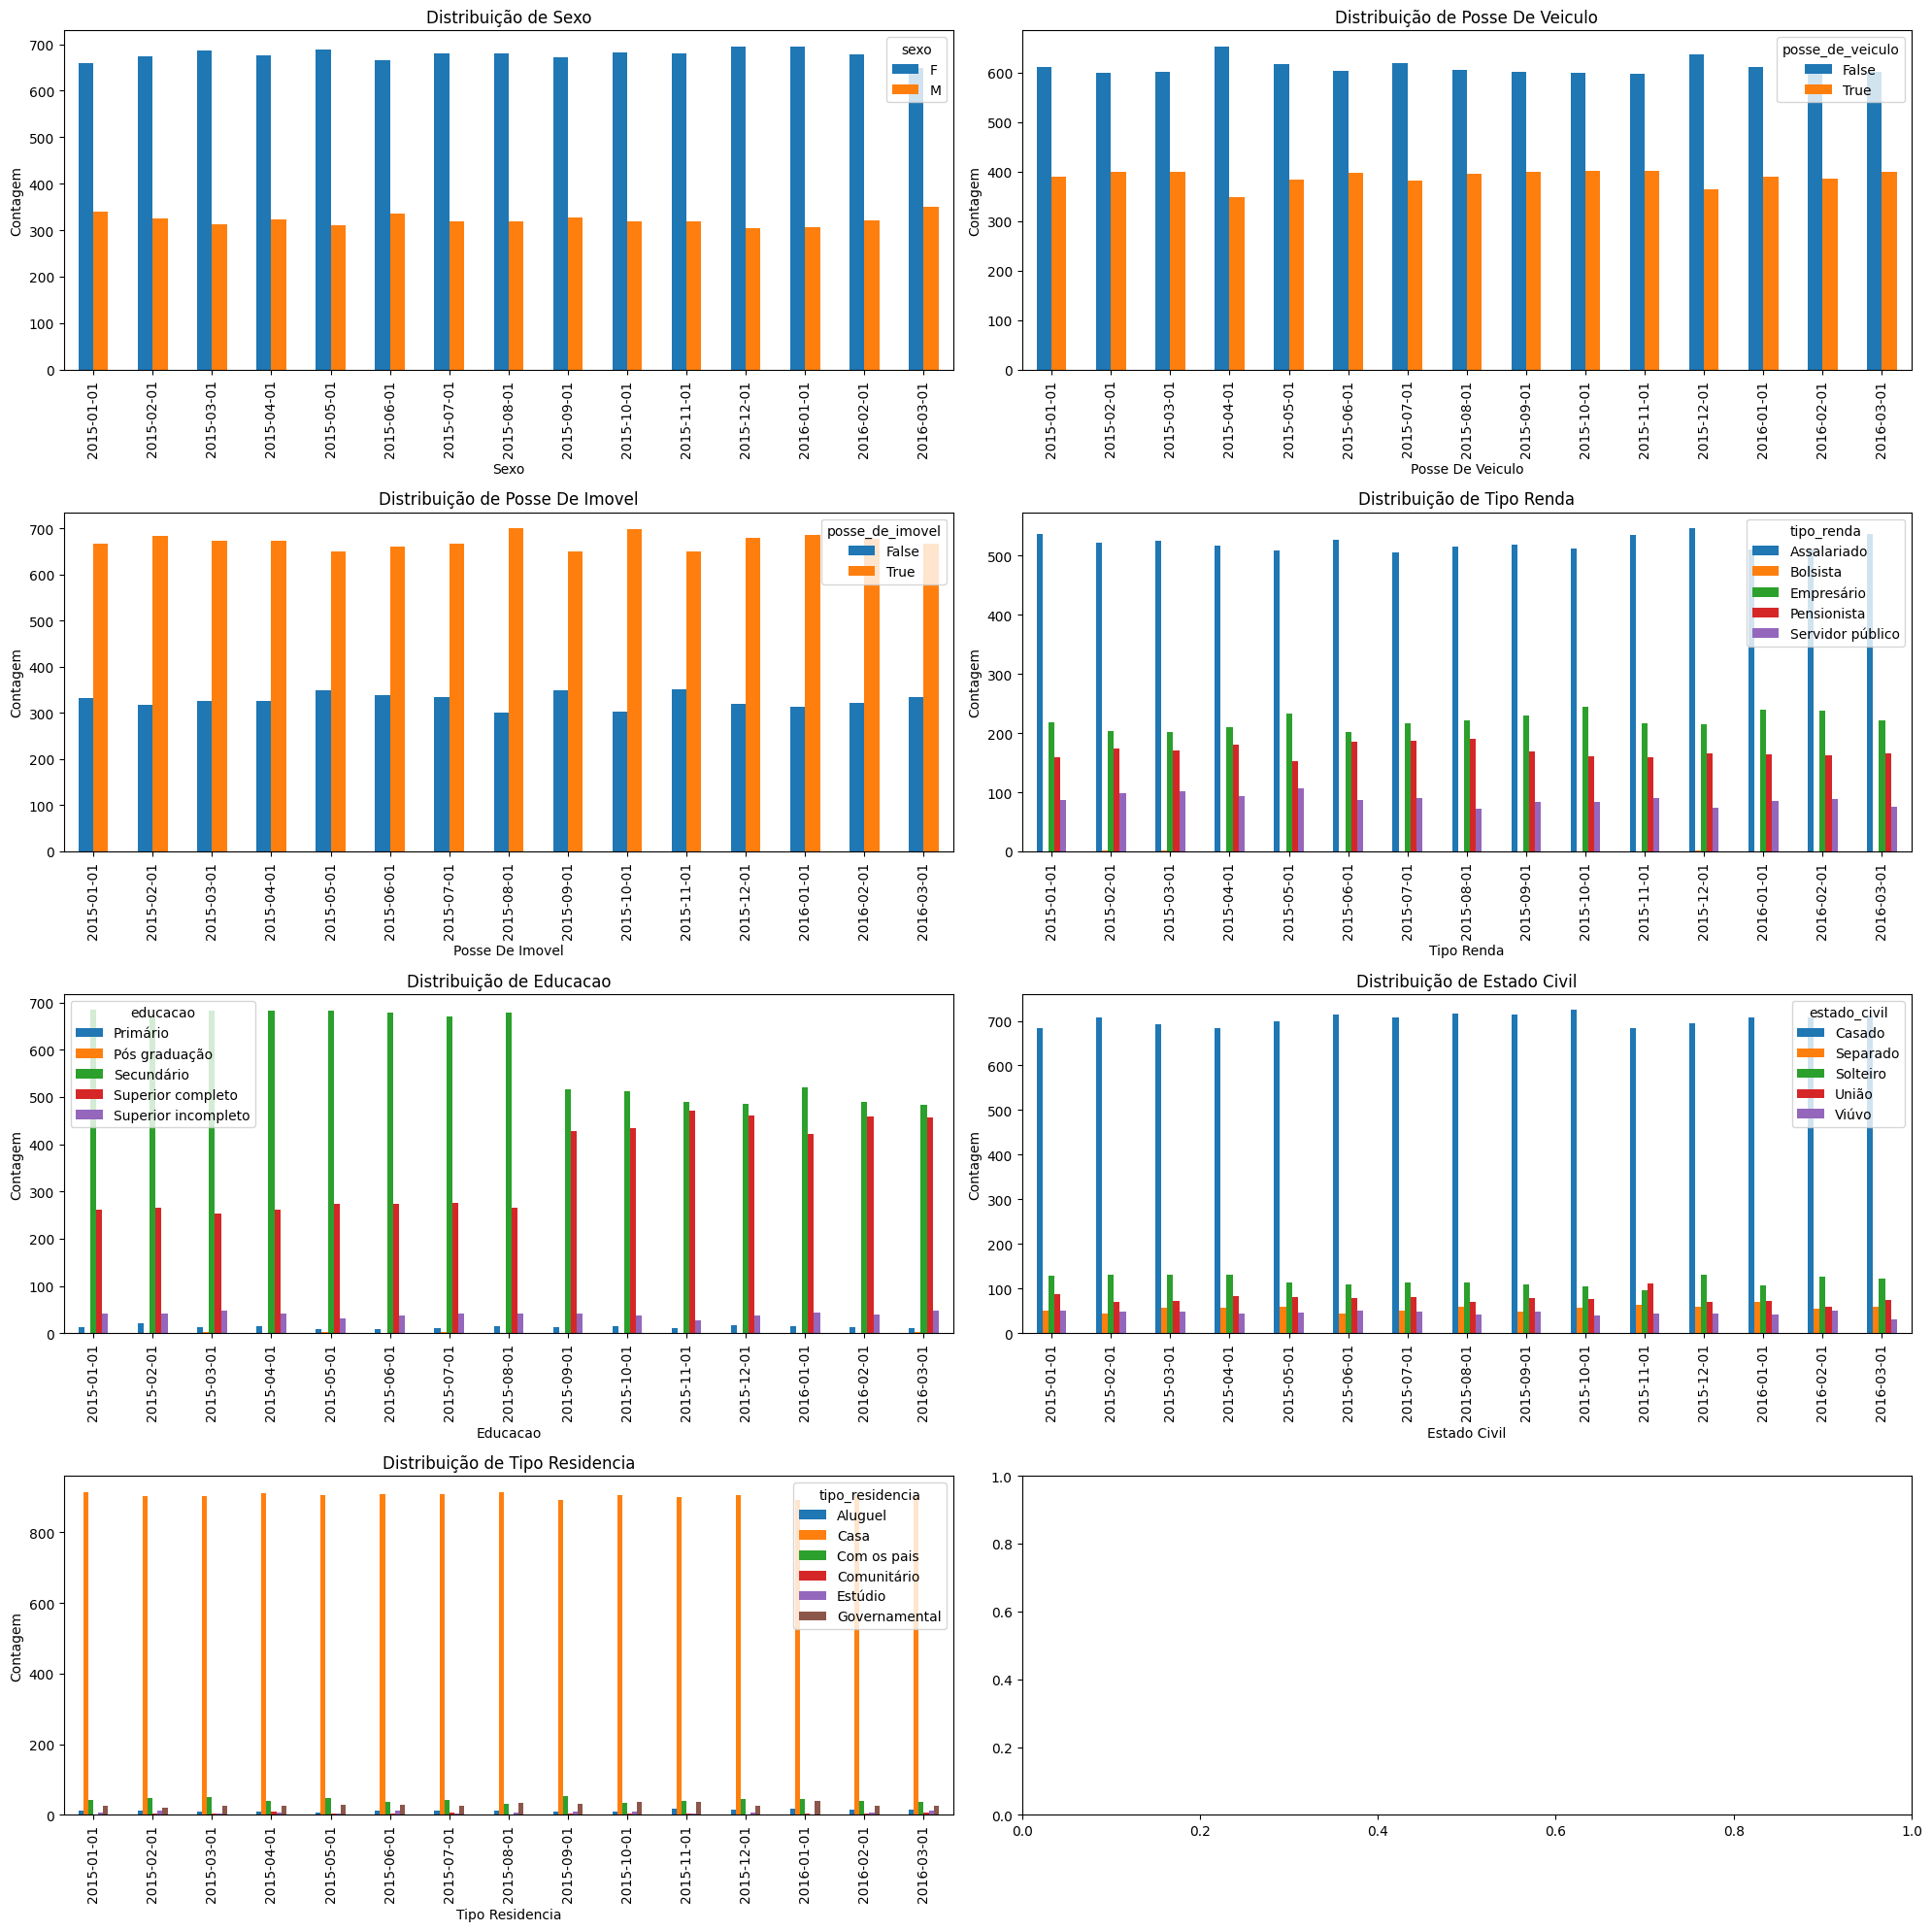

In [4]:
# Configuração da área de plotagem 2x4
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Transforma a matriz de eixos em uma lista plana para facilitar o loop

for i, variavel in enumerate(colunas_qualitativas):
    # Agrupe os dados por tempo e contagem da variável qualitativa
    grouped_data = df.groupby(['data_ref', variavel]).size().unstack()
    
    # Crie o gráfico de barras para a variável qualitativa
    ax = axes[i]  # Selecione o eixo correspondente
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribuição de {variavel.replace("_", " ").title()}')
    ax.set_xlabel(variavel.replace("_", " ").title())
    ax.set_ylabel('Contagem')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

- Podemos vericar que somente a variável 'Distribuição de Educação' possui uma variação significativa ao longo do tempo, podendo indicar uma instabilidade em relação a esta variável e a necessidade de ajustes em modelos que sejam construídos com este dataset.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

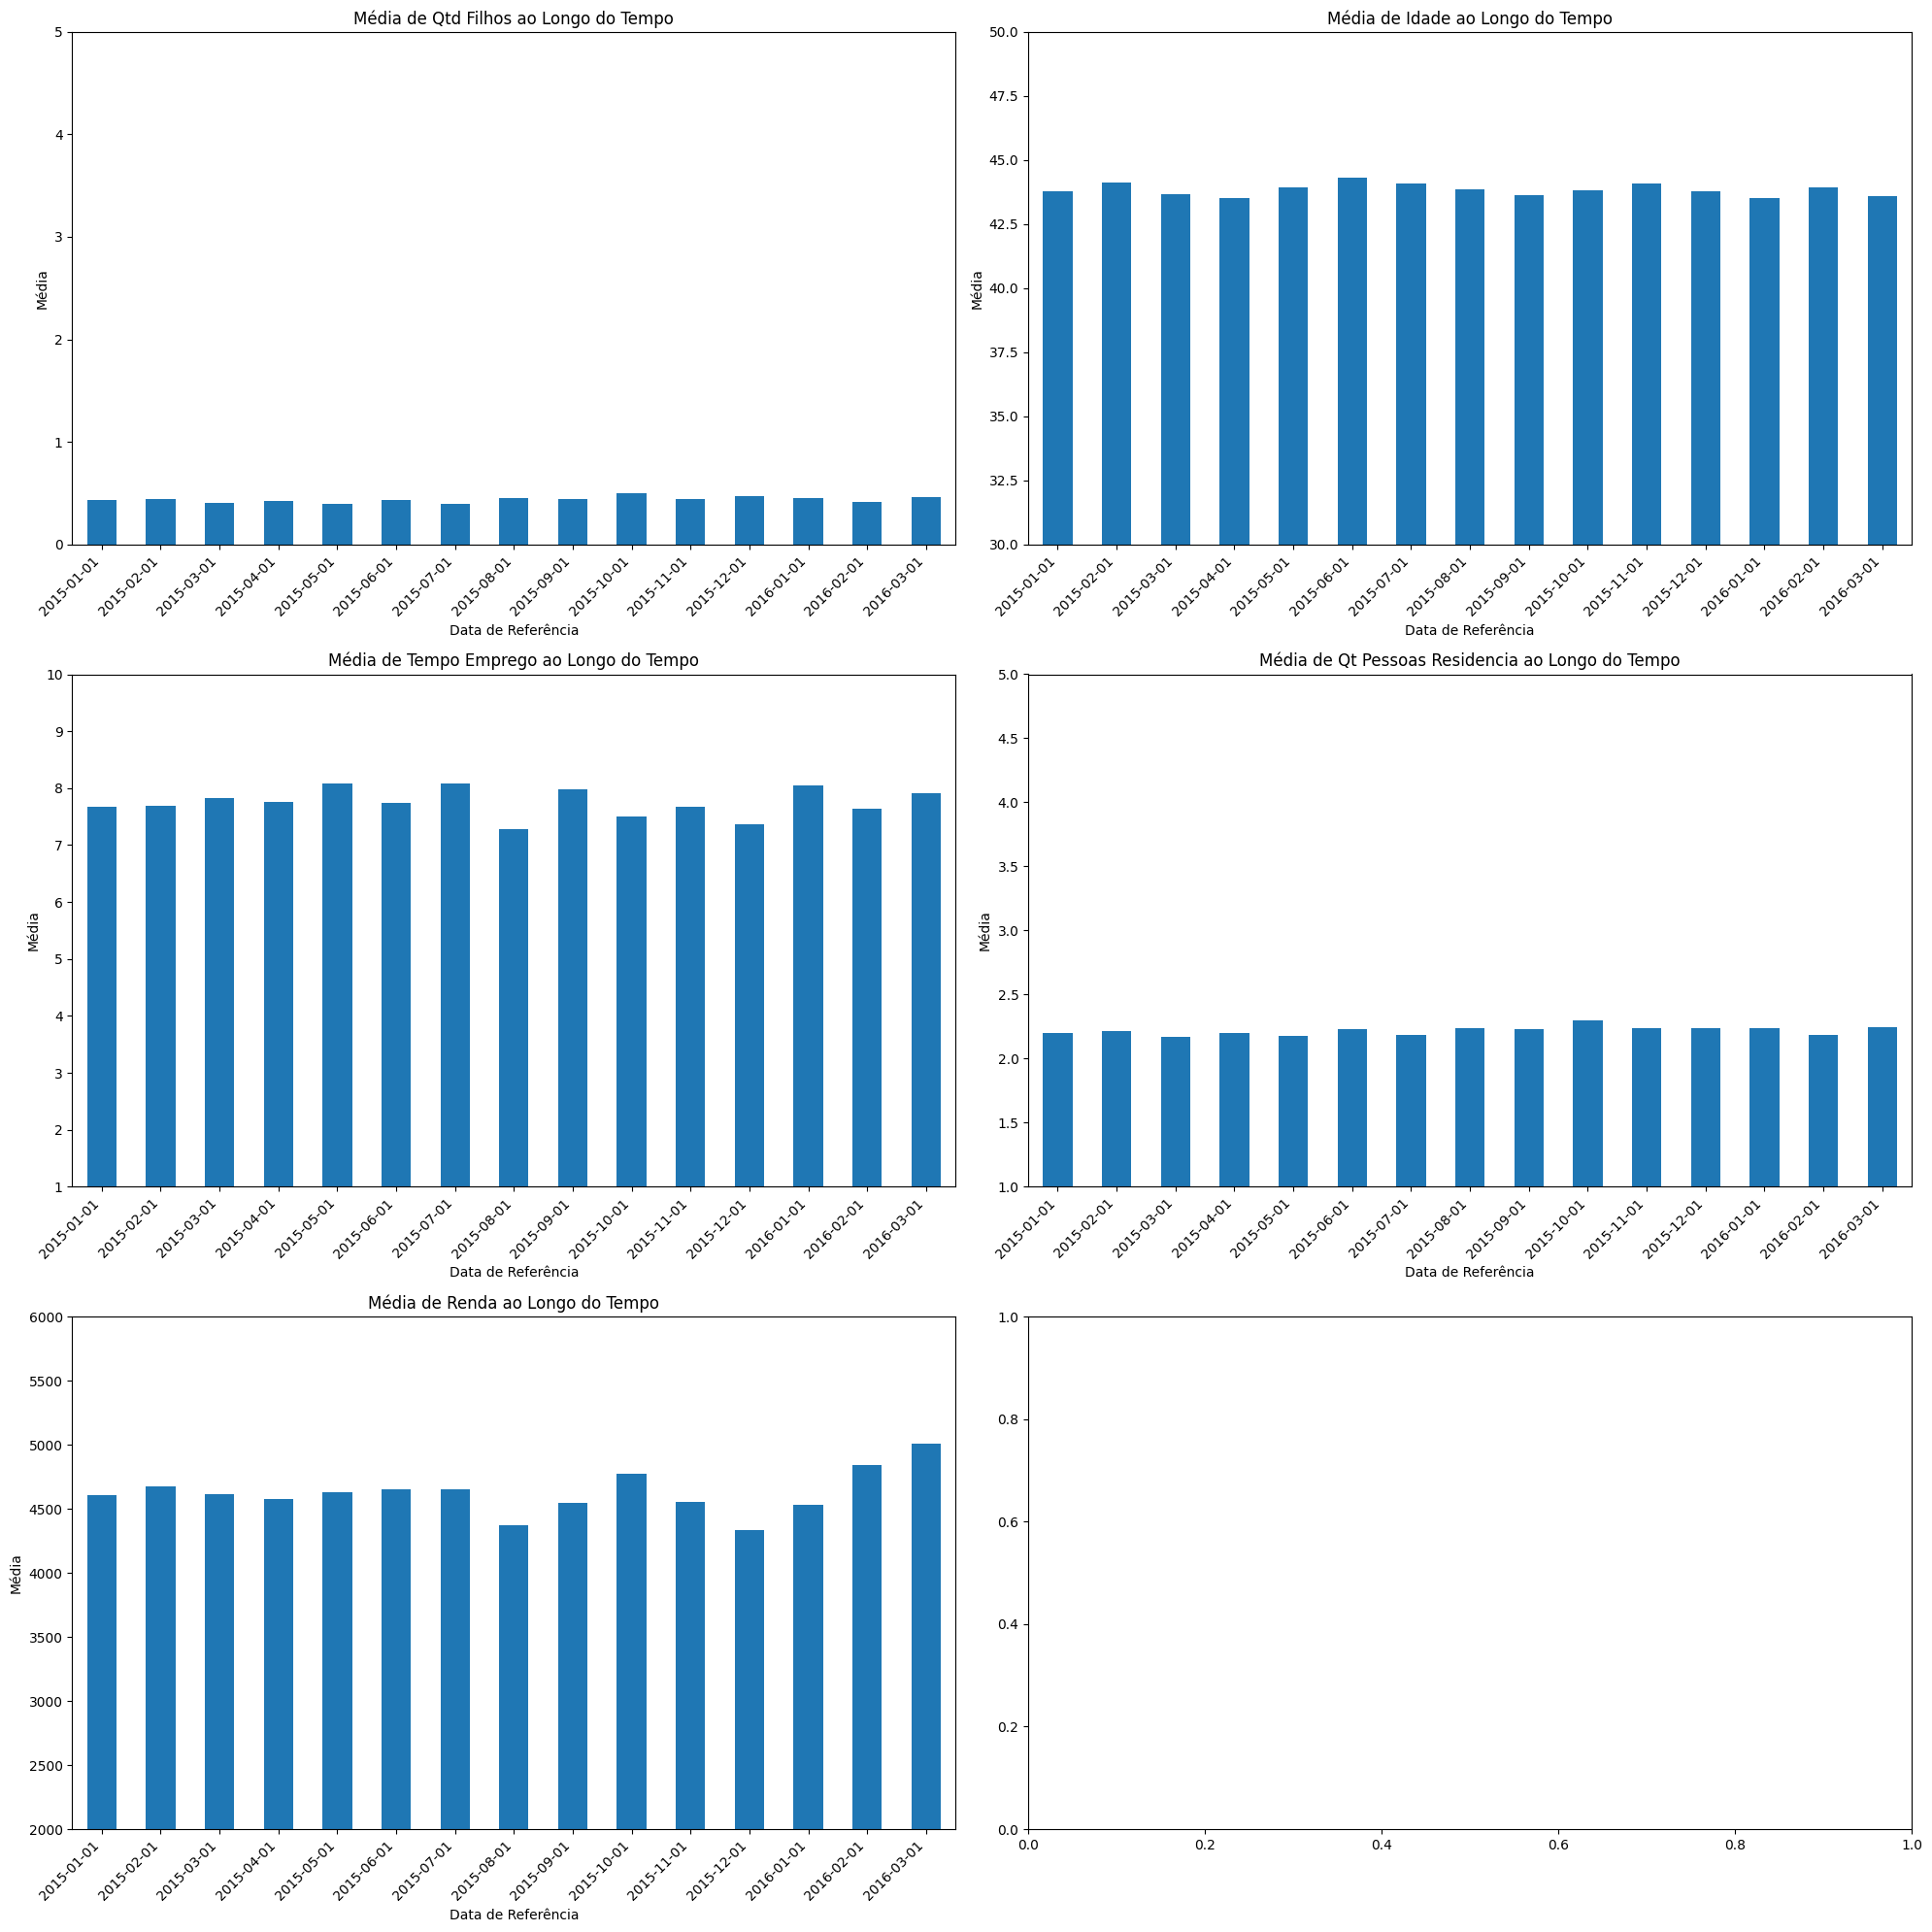

In [5]:
# Suponha que 'data_ref' seja a coluna representando o tempo no DataFrame 'df'
# Suponha que 'variaveis_quantitativas' sejam as variáveis quantitativas a serem analisadas
variaveis_quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# Limites de escala para cada variável (mínimo, máximo)
limites_escala = {
    'qtd_filhos': (0, 5),
    'idade': (30, 50),
    'tempo_emprego': (1, 10),
    'qt_pessoas_residencia': (1, 5),
    'renda': (2000, 6000)
}

# Configuração da área de plotagem
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Transforma a matriz de eixos em uma lista plana para facilitar o loop

for i, variavel in enumerate(variaveis_quantitativas):
    # Agrupe os dados por tempo e calcule a média da variável quantitativa para cada nível
    grouped_data = df.groupby(['data_ref'])[variavel].mean()
    
    # Crie o gráfico de linhas para a média da variável quantitativa
    ax = axes[i]  # Selecione o eixo correspondente
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_title(f'Média de {variavel.replace("_", " ").title()} ao Longo do Tempo')
    ax.set_xlabel('Data de Referência')
    ax.set_ylabel('Média')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ajuste a escala
    if variavel in limites_escala:
        ax.set_ylim(limites_escala[variavel])

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

- Podemos observar que as média das variáveis qualitativas ao longo do tempo não possuem uma variação significativa, então podemos usá-las em nossas análises.

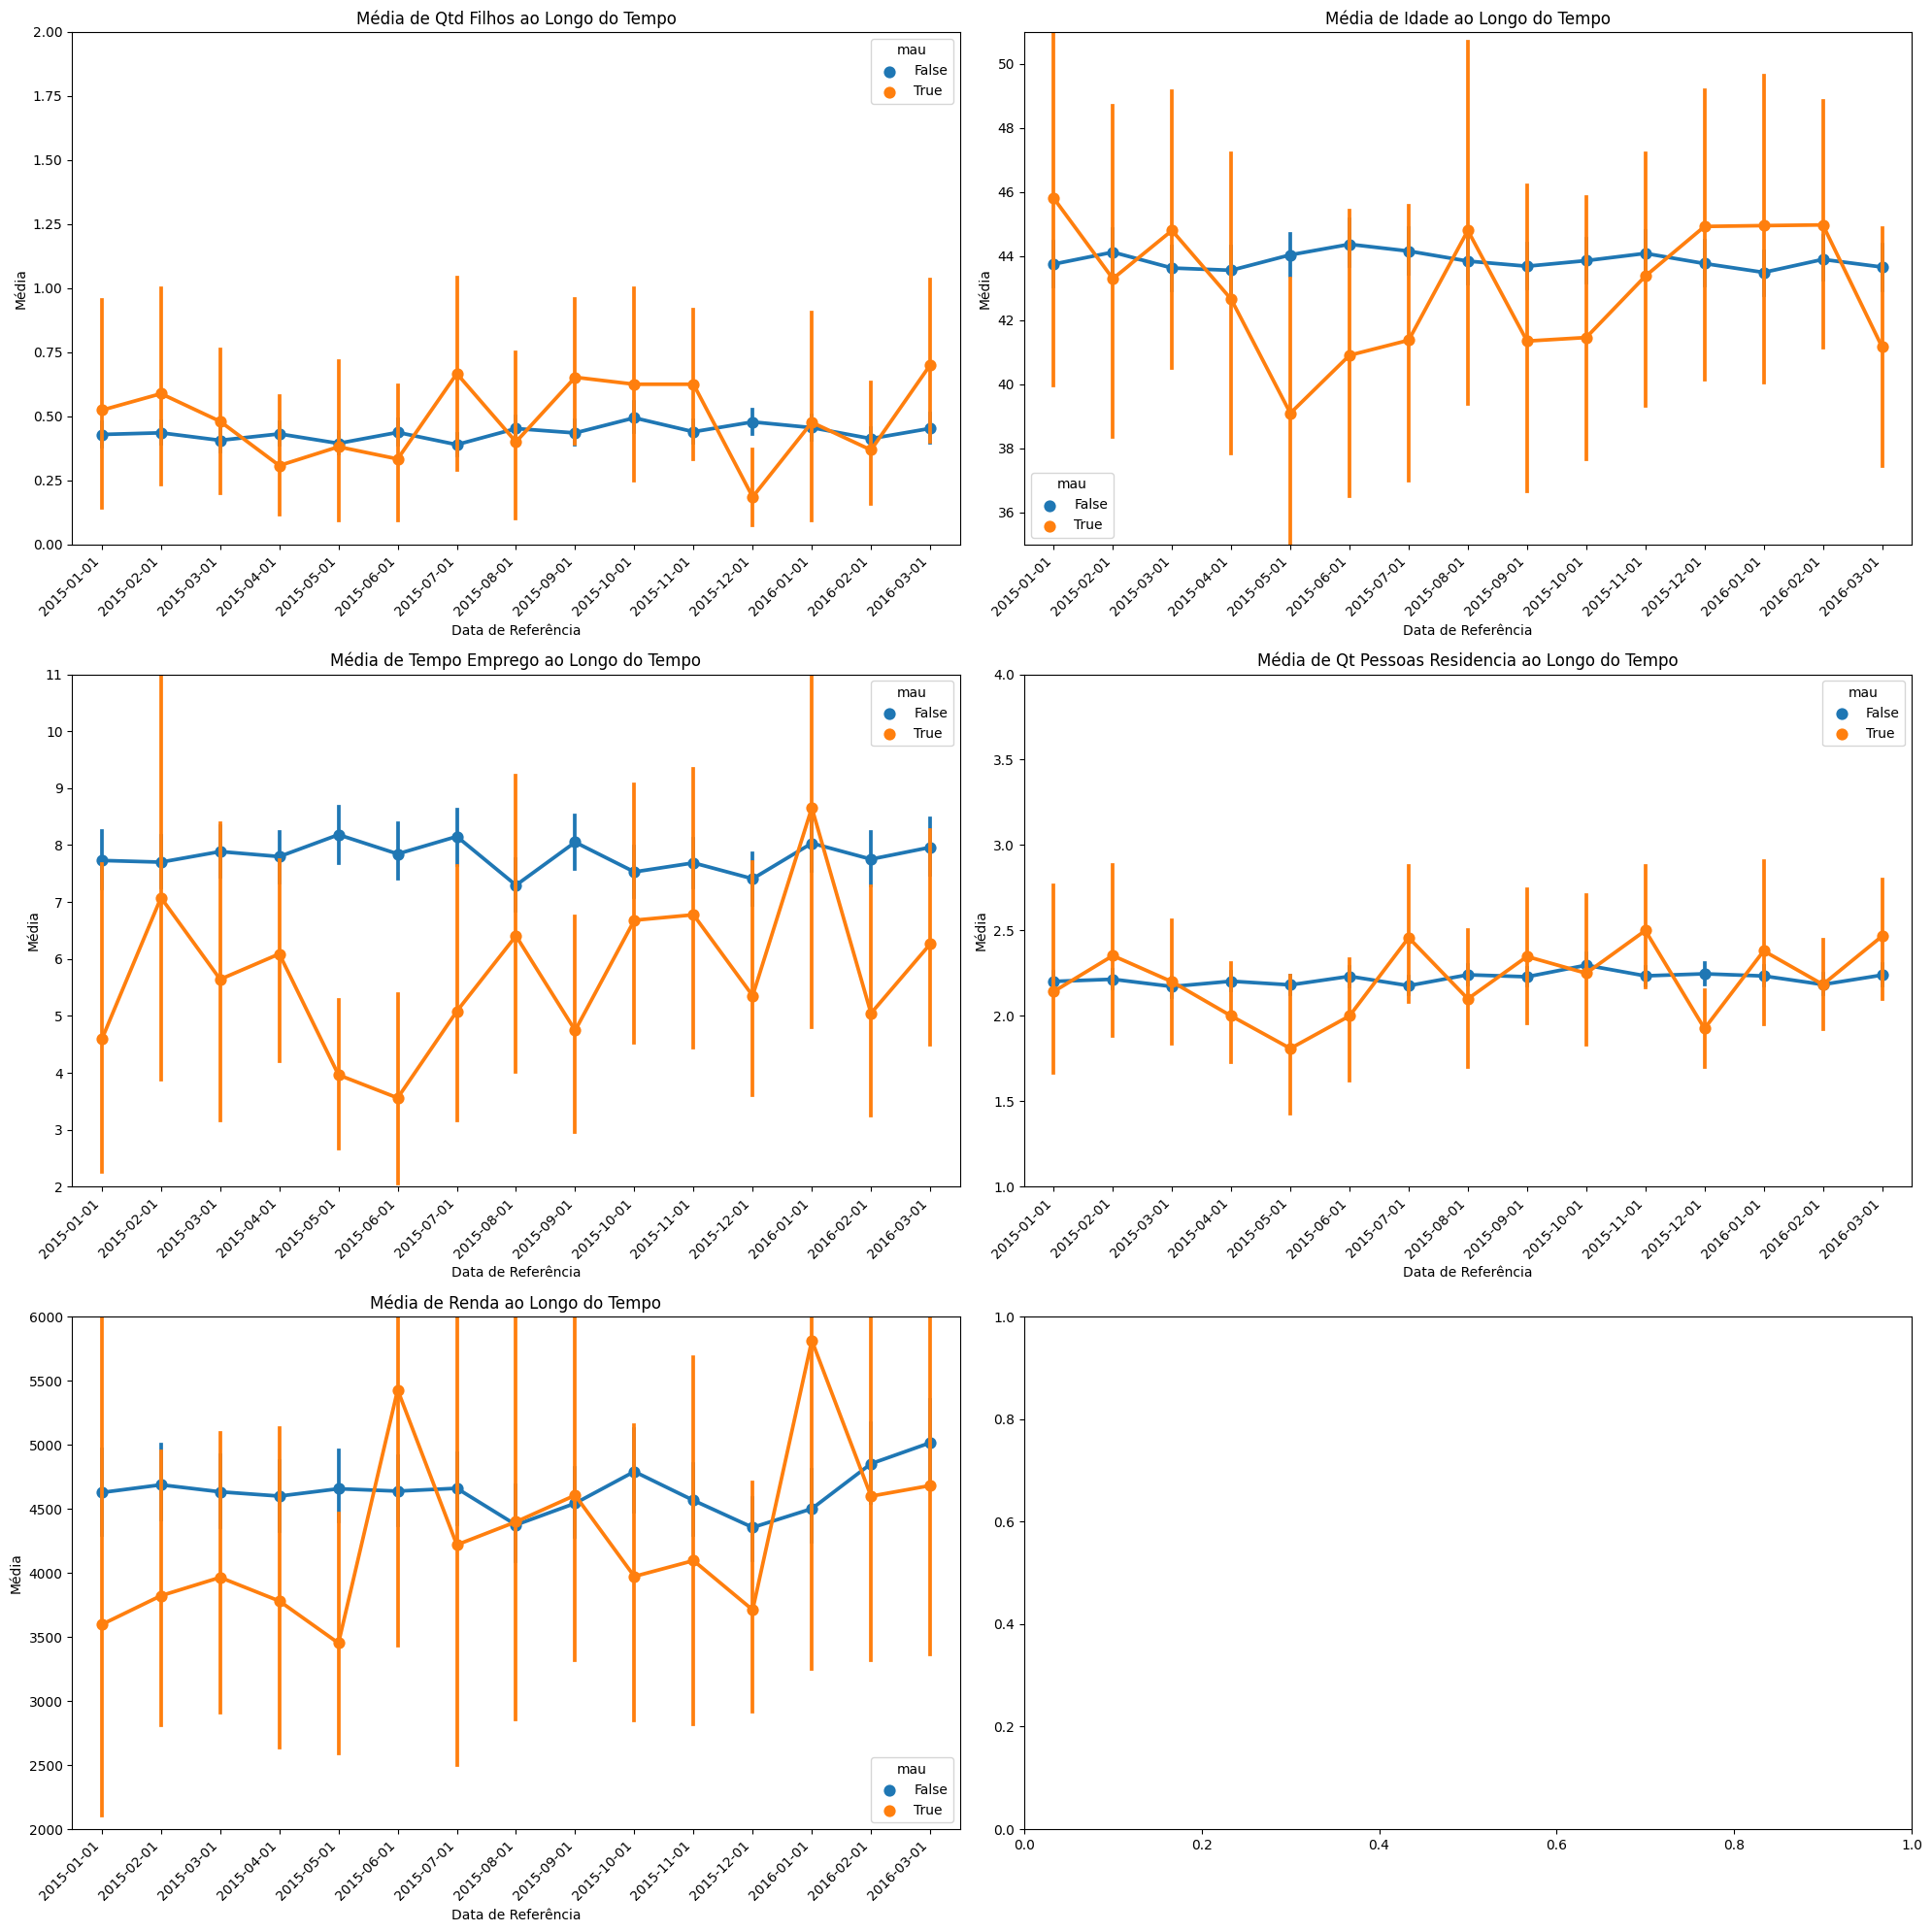

In [6]:
# Configuração da área de plotagem

# Limites de escala para cada variável (mínimo, máximo)
limites_escala = {
    'qtd_filhos': (0, 2),
    'idade': (35, 51),
    'tempo_emprego': (2, 11),
    'qt_pessoas_residencia': (1, 4),
    'renda': (2000, 6000)
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()
for i, variavel in enumerate(variaveis_quantitativas):
    # Crie o gráfico pointplot para a média da variável quantitativa
    ax = axes[i]  # Selecione o eixo correspondente
    sns.pointplot(x='data_ref', y=variavel, data=df, ax=ax, hue='mau')
    ax.set_title(f'Média de {variavel.replace("_", " ").title()} ao Longo do Tempo')
    ax.set_xlabel('Data de Referência')
    ax.set_ylabel('Média')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Ajuste a escala
    if variavel in limites_escala:
        ax.set_ylim(limites_escala[variavel])


# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

- Podemos observar que existe uma direfença na média das variáveis em relação a variável target, podendo existir algum grau de explicabilidade.